In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import statsmodels.api as sm
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER = "White_noise"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
num_samples = 100

# 가우시안 분포로 100개 생성
sampleA = np.random.randn(num_samples)
seriesA = pd.Series(sampleA)
sampleB = np.random.randn(num_samples)
seriesB = pd.Series(sampleB)
print("sampleA : \n", sampleA, "\nSeriesA :\n",seriesA)
print("sampleB : \n", sampleB, "\nSeriesB :\n",seriesB)

sampleA : 
 [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21967189  0

그림 저장: sampleA
그림 저장: sampleB


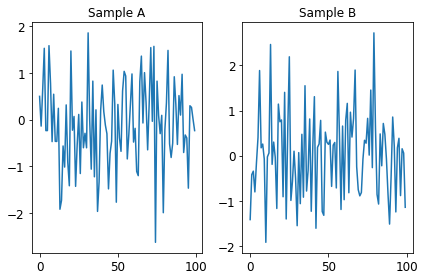

In [3]:
# SampleA와 SampleB의 그래프 출력
plt.subplot(1,2,1)
plt.title("Sample A")
plt.plot(sampleA)
save_fig("sampleA")
plt.subplot(1,2,2)
plt.title("Sample B")
plt.plot(sampleB)
save_fig("sampleB")

그림 저장: Auto Correlation A
그림 저장: Auto Correlation B


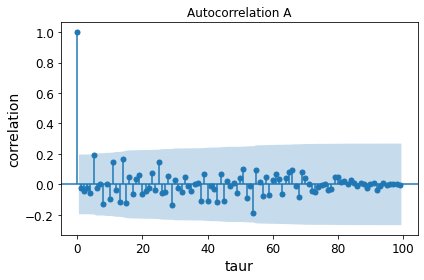

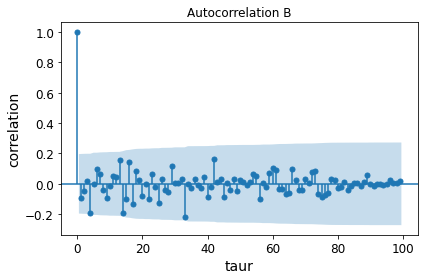

In [4]:
# Auto Correlation A
sm.graphics.tsa.plot_acf(sampleA, lags=num_samples-1)
plt.title("Autocorrelation A")
plt.xlabel("taur")
plt.ylabel("correlation")
save_fig("Auto Correlation A")
# AutoCorrelation B
sm.graphics.tsa.plot_acf(sampleB, lags=num_samples-1)
plt.title("Autocorrelation B")
plt.xlabel("taur")
plt.ylabel("correlation")
save_fig("Auto Correlation B")

In [5]:
autoAvgA=0
autoAvgB=0
for i in range(num_samples-1):
    autoAvgA += seriesA.autocorr(lag=i)
    autoAvgB += seriesB.autocorr(lag=i)
autoAvgA /= num_samples-1
autoAvgB /= num_samples-1
print("AutoCorrelation A : ",autoAvgA)
print("AutoCorrelation B : ",autoAvgB)

AutoCorrelation A :  0.013209138363326616
AutoCorrelation B :  -0.0263270923890055


그림 저장: CrossCorrelation
CrossCorrelation :  -0.06707455078964465


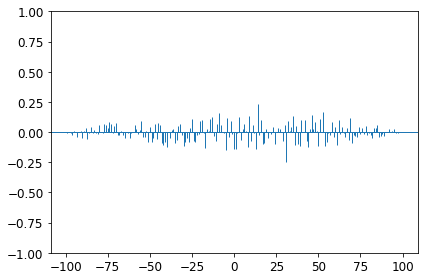

In [6]:
list_crossCorrelation = plt.xcorr(sampleA, sampleB, usevlines=True, maxlags=num_samples-1, normed=True, lw=1)
plt.ylim([-1,1])
crossAvg = 0
crossAvg = np.sum(list_crossCorrelation[1])
crossAvg /= len(list_crossCorrelation)
save_fig("CrossCorrelation")
print("CrossCorrelation : ",crossAvg)
